In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#load csv files
df = pd.read_csv("/content/gdrive/My Drive/CS3244/Final/Updated/full_train_preprocessed_subset.csv")
df = df.drop(columns=['Unnamed: 0'])

df_val = pd.read_csv("/content/gdrive/My Drive/CS3244/Final/Updated/full_val_preprocessed_subset.csv")
df_val = df_val.drop(columns=['Unnamed: 0'])

df_test = pd.read_csv("/content/gdrive/My Drive/CS3244/Final/Updated/full_test_preprocessed_subset.csv")
df_test = df_test.drop(columns=['Unnamed: 0'])

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,annotations,text,hashtag,tokens,upper_case,num_digits,num_hashtags,num_words,average_word_length,positive,neutral,negative,compound,label
0,1384,Nobody go to Walmart in sulphur,NaN,"['nobody', 'go', 'walmart', 'sulphur']",2,0,1,6,4.333333,0.0,1.0,0.0,0.0,2
1,1384,@emberlhamon @MLidak welcome to the ugly club!!,NaN,"['welcome', 'ugly', 'club']",2,0,1,8,5.125000,0.0,1.0,0.0,0.0,2
2,1384,getting to help coach jr high,NaN,"['getting', 'help', 'coach', 'jr', 'high']",0,0,1,6,4.000000,0.0,1.0,0.0,0.0,2
3,1384,Yo Gotti and Black Youngsta on stage we all th...,NaN,"['yo', 'gotti', 'black', 'youngsta', 'stage', ...",4,0,1,13,3.692308,0.0,1.0,0.0,0.0,2
4,1384,@spenceribarra just making sure I haven't been...,NaN,"['making', 'sure', 'havent', 'replaced']",1,0,1,9,5.333333,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133994,1392,Agape Worshippers their voices are so angelic...,NaN,"['agape', 'worshipper', 'voice', 'angelic', 'g...",3,0,1,12,5.000000,0.0,1.0,0.0,0.0,3
133995,1392,@abike \nHe's a cutie,NaN,"['he', 'cutie']",1,0,1,5,3.400000,0.0,1.0,0.0,0.0,3
133996,1392,@Americooligan thanks,NaN,['thanks'],1,0,1,3,6.666667,0.0,1.0,0.0,0.0,3
133997,1392,Ari's mom braided my hair,NaN,"['aris', 'mom', 'braided', 'hair']",1,0,1,6,3.500000,0.0,1.0,0.0,0.0,3


In [ ]:
glove2vector = {}

with open(f'/content/gdrive/MyDrive/CS3244/Glove Embeddings/glove.twitter.27B.100d.txt', 'rb') as f:
  for l in f:
    line = l.decode().split()
    word = line[0]
    vect = np.array(line[1:]).astype(np.float)
    glove2vector[word] = vect 

len(glove2vector)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


1193515

In [ ]:
from ast import literal_eval
import re

def clean_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    return sentence

def join_text(x):
  return clean_text(x)
df["text_clean"] = df["text"].apply(lambda x: join_text(x))
df_val["text_clean"] = df_val["text"].apply(lambda x: join_text(x))
df_test["text_clean"] = df_test["text"].apply(lambda x: join_text(x))

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = df["text_clean"], df["label"], df_val["text_clean"], df_val["label"], df_test["text_clean"], df_test["label"]

In [ ]:
def transform(X):
  return np.array([
            np.mean([glove2vector[w] for w in words if w in glove2vector]
                   or [np.zeros(100)], axis=0) for words in X])

train_padded = transform(X_train)
val_padded = transform(X_val)
test_padded = transform(X_test)

In [ ]:
train_padded

array([[ 0.23400366,  0.09974813, -0.05533154, ...,  0.01511592,
         0.17945025, -0.3447125 ],
       [ 0.19103391, -0.00917023,  0.01796494, ...,  0.00976529,
         0.2184992 , -0.31596919],
       [ 0.29819323,  0.07012933, -0.13452254, ...,  0.0552135 ,
         0.05838642, -0.41722173],
       ...,
       [ 0.31172059,  0.00648244, -0.04439372, ..., -0.02361194,
         0.24631644, -0.34054616],
       [ 0.18724139,  0.07823684,  0.04382158, ..., -0.19728805,
         0.37236505, -0.39782895],
       [ 0.4342641 ,  0.1808583 , -0.166271  , ..., -0.0422217 ,
        -0.2198214 , -0.3452    ]])

In [ ]:
from sklearn.svm import SVC
import pickle
from sklearn.metrics import confusion_matrix
import matplotlib as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', SVC(kernel='rbf', gamma="scale"))])
pipe.fit(train_padded, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('svc', SVC())])

In [ ]:
filename = 'SVM_new.sav'
pickle.dump(pipe, open(filename, 'wb'))

In [ ]:
pipe.score(test_padded, y_test)

0.29889234015120436

In [ ]:
predicted = pipe.predict(test_padded)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40      3934
           1       0.26      0.50      0.34      3546
           2       0.18      0.01      0.01      2911
           3       0.33      0.33      0.33      3619
           4       0.28      0.05      0.08      3053

    accuracy                           0.30     17063
   macro avg       0.28      0.28      0.23     17063
weighted avg       0.28      0.30      0.25     17063



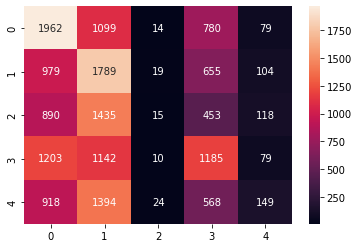

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
svm_matrix = confusion_matrix(y_test,predicted)  
sb.heatmap(svm_matrix, annot=True, fmt='g')

#Hyperparameter Tuning

In [ ]:
#Extract out support vectors (do hyperparameter tuning for the model)